In [4]:
token = ""

질문 답변

In [8]:
import json
import requests

API_URL = "https://api-inference.huggingface.co/models/deepset/roberta-base-squad2"
headers = {"Authorization": f"Bearer {token}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()
	
output = query({
	"inputs": {
	"question": "What is my name?",
	"context": "My name is Clara and I live in Berkeley."
},
})

output

{'score': 0.9331294298171997, 'start': 11, 'end': 16, 'answer': 'Clara'}

이미지 생성하기

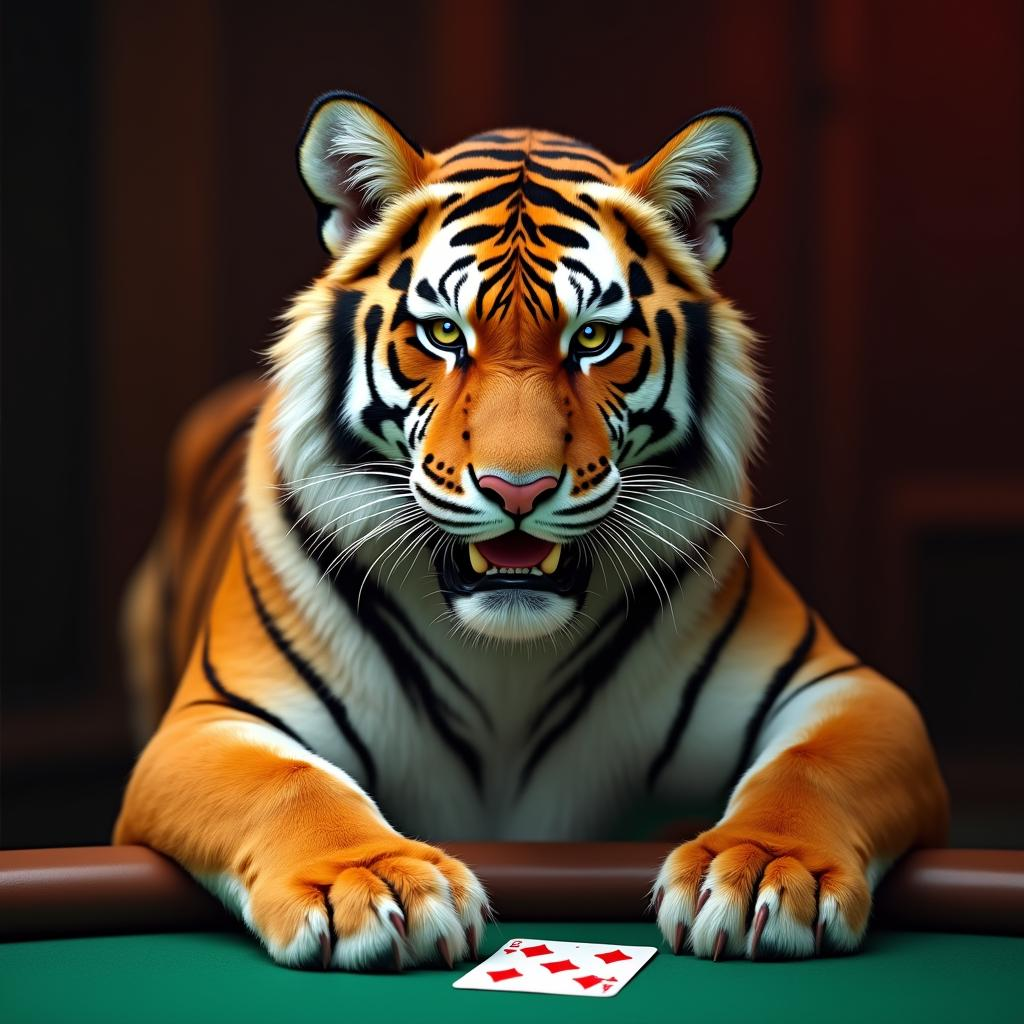

In [9]:
import requests

API_URL = "https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-dev"
headers = {"Authorization": f"Bearer {token}"}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.content
image_bytes = query({
	"inputs": "a card-playing tiger",
})
# You can access the image with PIL.Image for example
import io
from PIL import Image
image = Image.open(io.BytesIO(image_bytes))

image

In [11]:
from transformers import ViTImageProcessor, ViTModel
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

last_hidden_states

outputs


BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.1559,  0.0914,  0.1518,  ..., -0.3180, -0.0859, -0.0903],
         [-0.2254,  0.0864,  0.4752,  ..., -0.1781,  0.1726,  0.1334],
         [ 0.0444,  0.0677,  0.4199,  ..., -0.2576,  0.1191,  0.0130],
         ...,
         [-0.0153, -0.0396,  0.1684,  ..., -0.1672,  0.1869,  0.1025],
         [ 0.0249, -0.0382,  0.2046,  ...,  0.0517,  0.1489,  0.1320],
         [-0.1748, -0.0254,  0.2523,  ..., -0.1474,  0.1627,  0.1325]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 5.8399e-02, -3.0683e-01,  3.1213e-01, -1.1009e-01, -1.4752e-01,
          4.9735e-01, -1.5786e-01,  4.8658e-01, -4.6255e-01,  2.4344e-01,
          2.9942e-02,  2.8738e-01, -4.8914e-01, -9.9523e-03, -2.8943e-01,
          3.1443e-01, -6.2883e-02, -2.6637e-01, -3.9652e-01,  2.9896e-01,
          2.1507e-01, -1.9265e-01,  1.1786e-01,  2.5995e-01,  3.5440e-01,
         -3.7968e-01,  4.8320e-01, -3.5686e-01,  2.3996e-01, -8.0731e-01,
          1

- 한글 입력해서 영어 이미지 생성 모델 추론하기

In [ ]:
# 사용자가 입력한 값
text = '인공지능을 공부하는 학생들'

from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

article_ko = "인공지능을 공부하는 학생들"

# 번역 모델 불러오기
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
# 번역 모델에서 사용할 토크나이저 가져오기
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

# 전 처리
# translate Hindi to French
tokenizer.src_lang = "ko_KR"

# 한글 토크나이징
encoded_ko = tokenizer(article_ko, return_tensors="pt")

# 추론
generated_tokens = model.generate(
    **encoded_ko,
    forced_bos_token_id=tokenizer.lang_code_to_id["en_XX"]
)
tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
# => "Le chef de l 'ONU affirme qu 'il n 'y a pas de solution militaire dans la Syrie."

# translate Arabic to English
tokenizer.src_lang = "ar_AR"
encoded_ar = tokenizer(article_ar, return_tensors="pt")
generated_tokens = model.generate(
    **encoded_ar,
    forced_bos_token_id=tokenizer.lang_code_to_id["en_XX"]
)
tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
# => "The Secretary-General of the United Nations says there is no military solution in Syria."


In [12]:
!pip install sentencepiece

   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   ---

한글 -> 영어 번역 후 이미지 생성하기

In [13]:
from transformers import pipeline
import requests

# 모델 불러오기
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ko-en")

# 추론, 토큰화
result = translator("여자가 된 짱구")

translated_text = result[0]['translation_text']

# 번역 결과
translated_text

# text to image
API_URL = "https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-dev"
headers = {"Authorization": f"Bearer {token}"}

# inference-api 호출
def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.content
image_bytes = query({
	"inputs": translated_text,
})
# You can access the image with PIL.Image for example

# 결과 출력
import io
from PIL import Image
image = Image.open(io.BytesIO(image_bytes))

image

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000002065D2B00E0>